# Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

* 這一章要來講 legends 的細節
* 先來看一下簡單的做法

## 基本款

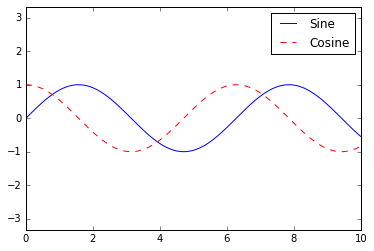

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine') # "-" 表示要畫線圖，b是black
ax.plot(x, np.cos(x), '--r', label='Cosine') # "--" 表示要畫虛線，r是red
ax.axis('equal')
leg = ax.legend(); # ax.legend() 表示要顯示 legend

* 要客製化 legend，就是在 `ax.legend()` 裡面下參數就好，例如：

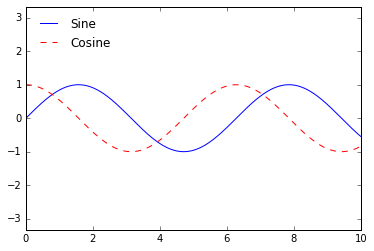

In [3]:
ax.legend(
    loc='upper left', # loc 要在 upper left
    frameon=False # 不要有 frame
)
fig

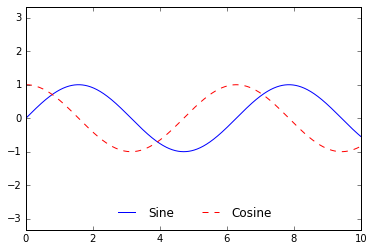

In [4]:
ax.legend(
    loc='lower center',
    frameon=False,  
    ncol=2 # legend 要分兩個 column 來呈現
)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

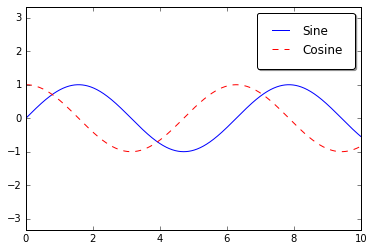

In [5]:
ax.legend(
    fancybox=True, # fancybox 是 園角矩形的意思
    framealpha=1, # legend 邊框的透明度
    shadow=True, # 邊框的陰影
    borderpad=1 # 文字外面的 padding
)
fig

For more information on available legend options, see the ``plt.legend`` docstring.

## 只呈現部分element

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

* 舉例來說，我畫了3條線圖，但我 legend 中只想標註2條，那我就第三條不要標 label 就好：

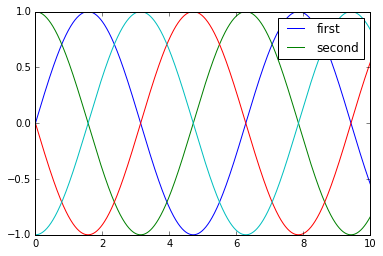

In [10]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

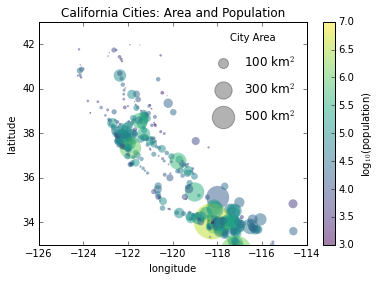

In [14]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 取出我們感興趣的資料
lat, lon = cities['latd'], cities['longd'] # 緯度和經度
population, area = cities['population_total'], cities['area_total_km2']

# 畫散布圖
plt.scatter(lon, lat, 
            label=None,
            c=np.log10(population), # 點的顏色depend on "population"的大小
            s=area, # 點的 size，depend on "area" 的大小
            alpha=0.5,
            cmap='viridis',
             linewidth=0)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 巧妙的建立legend
# 我們故意疊加一個 "空的" 散布圖，但有命名 label，就會有 legend 了
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## Multiple Legends

* 如果我想加上多個 legend 的話，照預設的做法是行不通的，後面的 legend 會蓋過前面的 
* 所以，這邊就得多做點客製化了，要用低階的 `ax.add_artist()` 來新增，如下例：

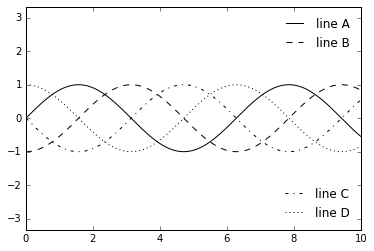

In [15]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);